# Manifold learning with Feature-type distributed clustering workflow is more informative compared to UMAP for tabular clinical datasets

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import math
import umap.umap_ as umap
%config InlineBackend.figure_format = 'svg'

In [2]:
from cluster_val import *

## Importing data

In [3]:
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data_with_target=pd.read_csv('preprocessed_migraine_data.csv')

In [4]:
np.random.seed(42)
data=data_with_target.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(400)]

data.set_index(pd.Series(i), inplace=True)

In [5]:
data.drop(['Unnamed: 0','Type'],axis=1,inplace=True)

## UMAP on original data

In [6]:
from fdc.fdc import feature_clustering

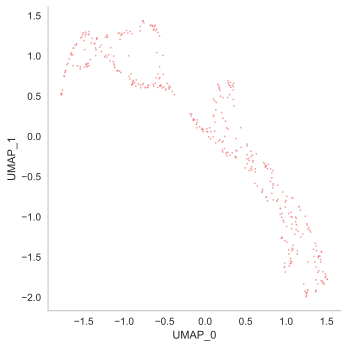

In [7]:
umap_emb=feature_clustering(15,0.1,'euclidean',data,True)

## Silhouette_score  and Dunn index for umap clusters extracted using K-means clustering

In [8]:
from fdc.clustering import Clustering

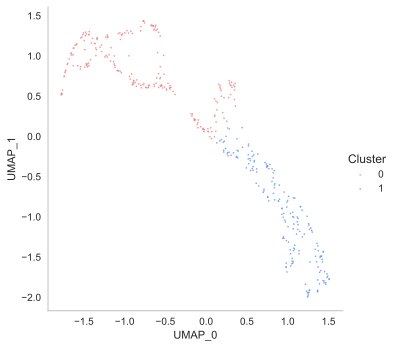

In [9]:
umap_clustering=Clustering(umap_emb,umap_emb,True)
umap_cluster_list,umap_cluster_counts=umap_clustering.K_means(2)

In [10]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [11]:
 silhouette_score(umap_emb, umap_cluster_list, metric='euclidean')


0.6538103205620339

## Visualizing Silhouette score (you can also choose the number of clusters based on score)

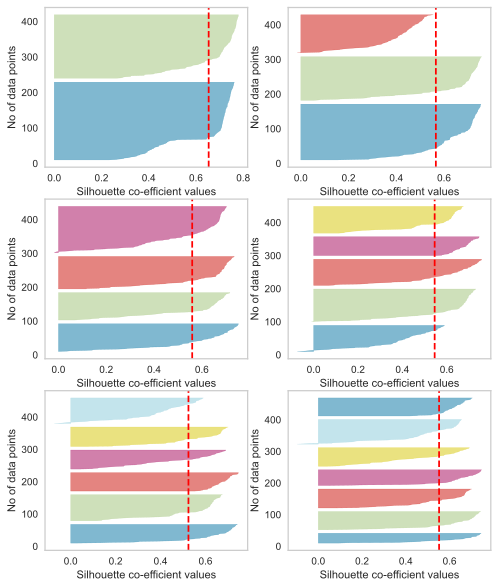

In [12]:
Silhouette_visual(umap_emb)

## Elbow plot for umap_embedding

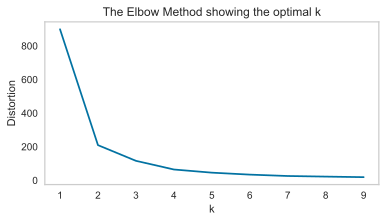

In [13]:
elbow_plot(umap_emb)

In [14]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list))

0.009496802555391088

## Silhouette_score  and Dunn index for umap clusters extracted using Agglomerative clustering

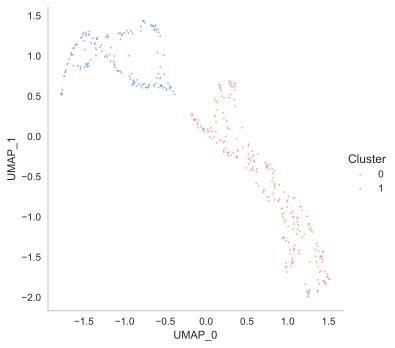

In [15]:
umap_cluster_list_agglo,umap_cluster_counts_agglo=umap_clustering.Agglomerative(2,'euclidean','ward')

In [16]:
silhouette_score(umap_emb, umap_cluster_list_agglo, metric='euclidean')

0.6438376553522397

In [17]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_agglo))

0.10897795465282636

## Silhouette_score  and Dunn index for umap clusters extracted using DBSCAN clustering

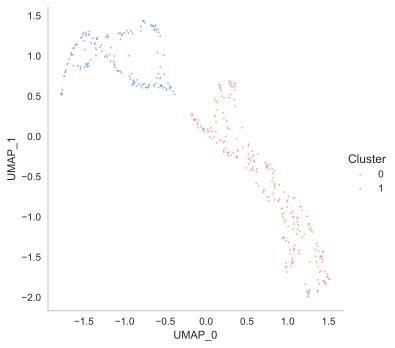

In [18]:
umap_cluster_list_dbscan,umap_cluster_counts_dbscan=umap_clustering.DBSCAN(0.5,20)

In [19]:
#removing noise indices from the embeddings
non_noise_indices= np.where(np.array(umap_cluster_list_dbscan)!=-1)
umap_emb= umap_emb.iloc[non_noise_indices]
#FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
umap_cluster_list_dbscan= np.array(umap_cluster_list_dbscan)[non_noise_indices]


In [20]:
silhouette_score(umap_emb, umap_cluster_list_dbscan, metric='euclidean')

0.6438376553522397

In [21]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_dbscan))

0.10897795465282636

## Dividing features
- cont_list=continueous features
- ord_list=ordinal features
- nom_list=nominal features



In [22]:
cont_list=['Age']

ord_list=['Duration','Frequency','Intensity','Visual','Nausea', 'Vomit']
nom_list=['Location','Character','Dysphasia', 'Vertigo', 'Tinnitus','Sensory','Phonophobia','Photophobia', 'Hypoacusis', 'Diplopia', 'Defect','Conscience', 'Paresthesia', 'DPF']

In [23]:
len(ord_list)

6

In [24]:
len(nom_list)

14

In [25]:
len(cont_list)

1

## FDC on original data

In [26]:
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified

FDC.normalize (init): 0.00000 / 0.000s
FDC.normalize (clustering CONT): 2.73438 / 2.734s
FDC.normalize (clustering ORD): 2.78125 / 5.516s
FDC.normalize (clustering NOM): 3.45312 / 8.969s
FDC.normalize (concat): 0.00000 / 8.969s
FDC.normalize (umap 5 -> 2): 1.84375 / 10.812s
FDC.normalize (array -> DataFrame): 0.00000 / 10.812s


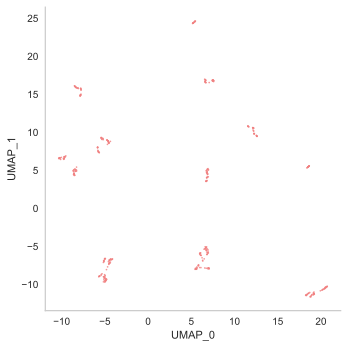

FDC.normalize (plotting): 0.96875 / 11.781s
FDC.normalize (array -> DataFrame): 0.00000 / 11.781s
FDC.normalize (total): 0.00000 / 11.781s


In [27]:

fdc = FDC(clustering_cont=Clustering('euclidean',15,0.1,max_components=1)
          , clustering_ord=Clustering(modified_can,15,0.1)
          , clustering_nom=Clustering('hamming',15,0.1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,n_neighbors=15, min_dist=0.1,cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

## Silhouette_score  and Dunn index for fdc clusters extracted (intermediate_dim) using K-means clustering

In [28]:
from fdc.clustering import Clustering

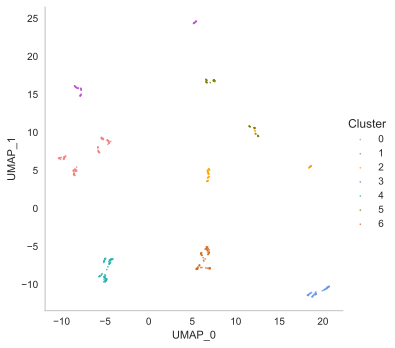

In [29]:
clustering=Clustering(FDC_emb_high,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(7)

In [30]:
FDC_emb_high['Cluster'] = cluster_list

In [31]:
silhouette_score(FDC_emb_high, cluster_list, metric='euclidean')


0.5998758234630978

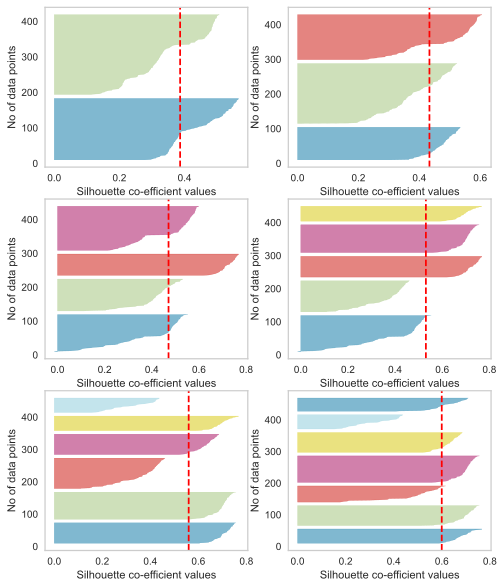

In [32]:
Silhouette_visual(FDC_emb_high)

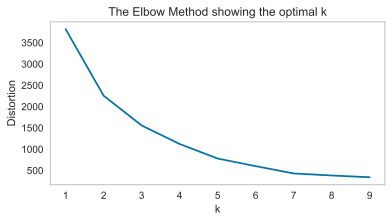

In [33]:
elbow_plot(FDC_emb_high)

In [34]:
dunn_index(cluster_wise_df(FDC_emb_high,cluster_list))

0.5036626194871344

## Silhouette_score  and Dunn index for fdc clusters extracted (intermediate_dim) using Agglomerative clustering

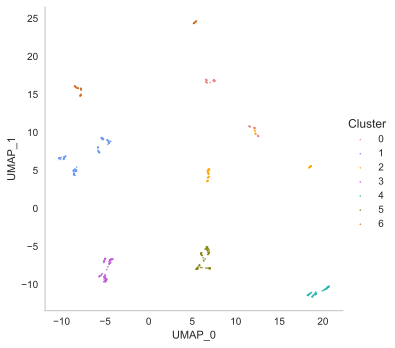

In [35]:
cluster_list_agglo,cluster_counts_agglo=clustering.Agglomerative(7,'euclidean','ward')

In [36]:
FDC_emb_high['Cluster'] = cluster_list_agglo

In [37]:
silhouette_score(FDC_emb_high, cluster_list_agglo, metric='euclidean')

0.572270621061447

In [38]:
dunn_index(cluster_wise_df(FDC_emb_high,cluster_list_agglo))

0.23655710362042467

## Silhouette_score  and Dunn index for fdc clusters extracted (intermediate_dim) using DBSCAN clustering

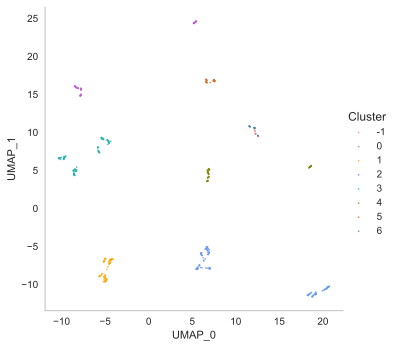

In [39]:
cluster_list_dbscan,cluster_counts_dbscan=clustering.DBSCAN(1.5,15)

In [40]:
cluster_counts_dbscan

array([ 13, 110,  64,  43,  85,  45,  25,  15], dtype=int64)

In [41]:
FDC_emb_high['Cluster'] = cluster_list_dbscan

In [42]:
#removing noise indices from the embeddings
non_noise_indices= np.where(np.array(cluster_list)!=-1)
FDC_emb_high= FDC_emb_high.iloc[non_noise_indices]
FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
cluster_list= np.array(cluster_list)[non_noise_indices]


In [43]:
silhouette_score(FDC_emb_high, cluster_list_dbscan, metric='euclidean')

0.5763374328307391

In [44]:
dunn_index(cluster_wise_df(FDC_emb_high,cluster_list_dbscan))

0.44811782859514765